In [1]:
import scipy.io
import numpy as np
import sys
sys.path.insert(0, '..')
from utils import load_files, get_rdms, get_rdm, mean_clip
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
%load_ext autoreload
%autoreload 2

In [2]:
def plot_rdms(axs, data):
    for i, x in enumerate(zip(data.keys(), data.values(), axs.flat)):
        k = x[0]
        v = x[1]
        ax = x[2]
        sns.heatmap(v, ax=ax, cmap='plasma')
        ax.set_title(k, fontsize=30, fontweight='bold')

In [3]:
clip_img = load_files("clip/img")
clip_img = clip_img.reshape(12, 810, int(622080/810))
clip_txt = load_files("clip/txt")
mean_clip_layers_img = mean_clip(clip_img, 10, "Image")
mean_clip_layers_txt = mean_clip(clip_txt, 1, "Text")
sclip_img_rdms = get_rdms(mean_clip_layers_img)
sclip_txt_rdms = get_rdms(mean_clip_layers_txt)

clip_random_img = load_files("clip_feats_random/img")
clip_random_img = clip_random_img.reshape(12, 810, int(622080/810))
clip_random_txt = load_files("clip_feats_random/txt")
mean_clip_random_layers_img = mean_clip(clip_random_img, 10, "Random Image")
mean_clip_random_layers_txt = mean_clip(clip_random_txt, 1, "Random Text")
sclip_random_img_rdms = get_rdms(mean_clip_random_layers_img)
sclip_random_txt_rdms = get_rdms(mean_clip_random_layers_txt)
clip_img.shape, clip_txt.shape

(torch.Size([12, 810, 768]), torch.Size([12, 81, 512]))

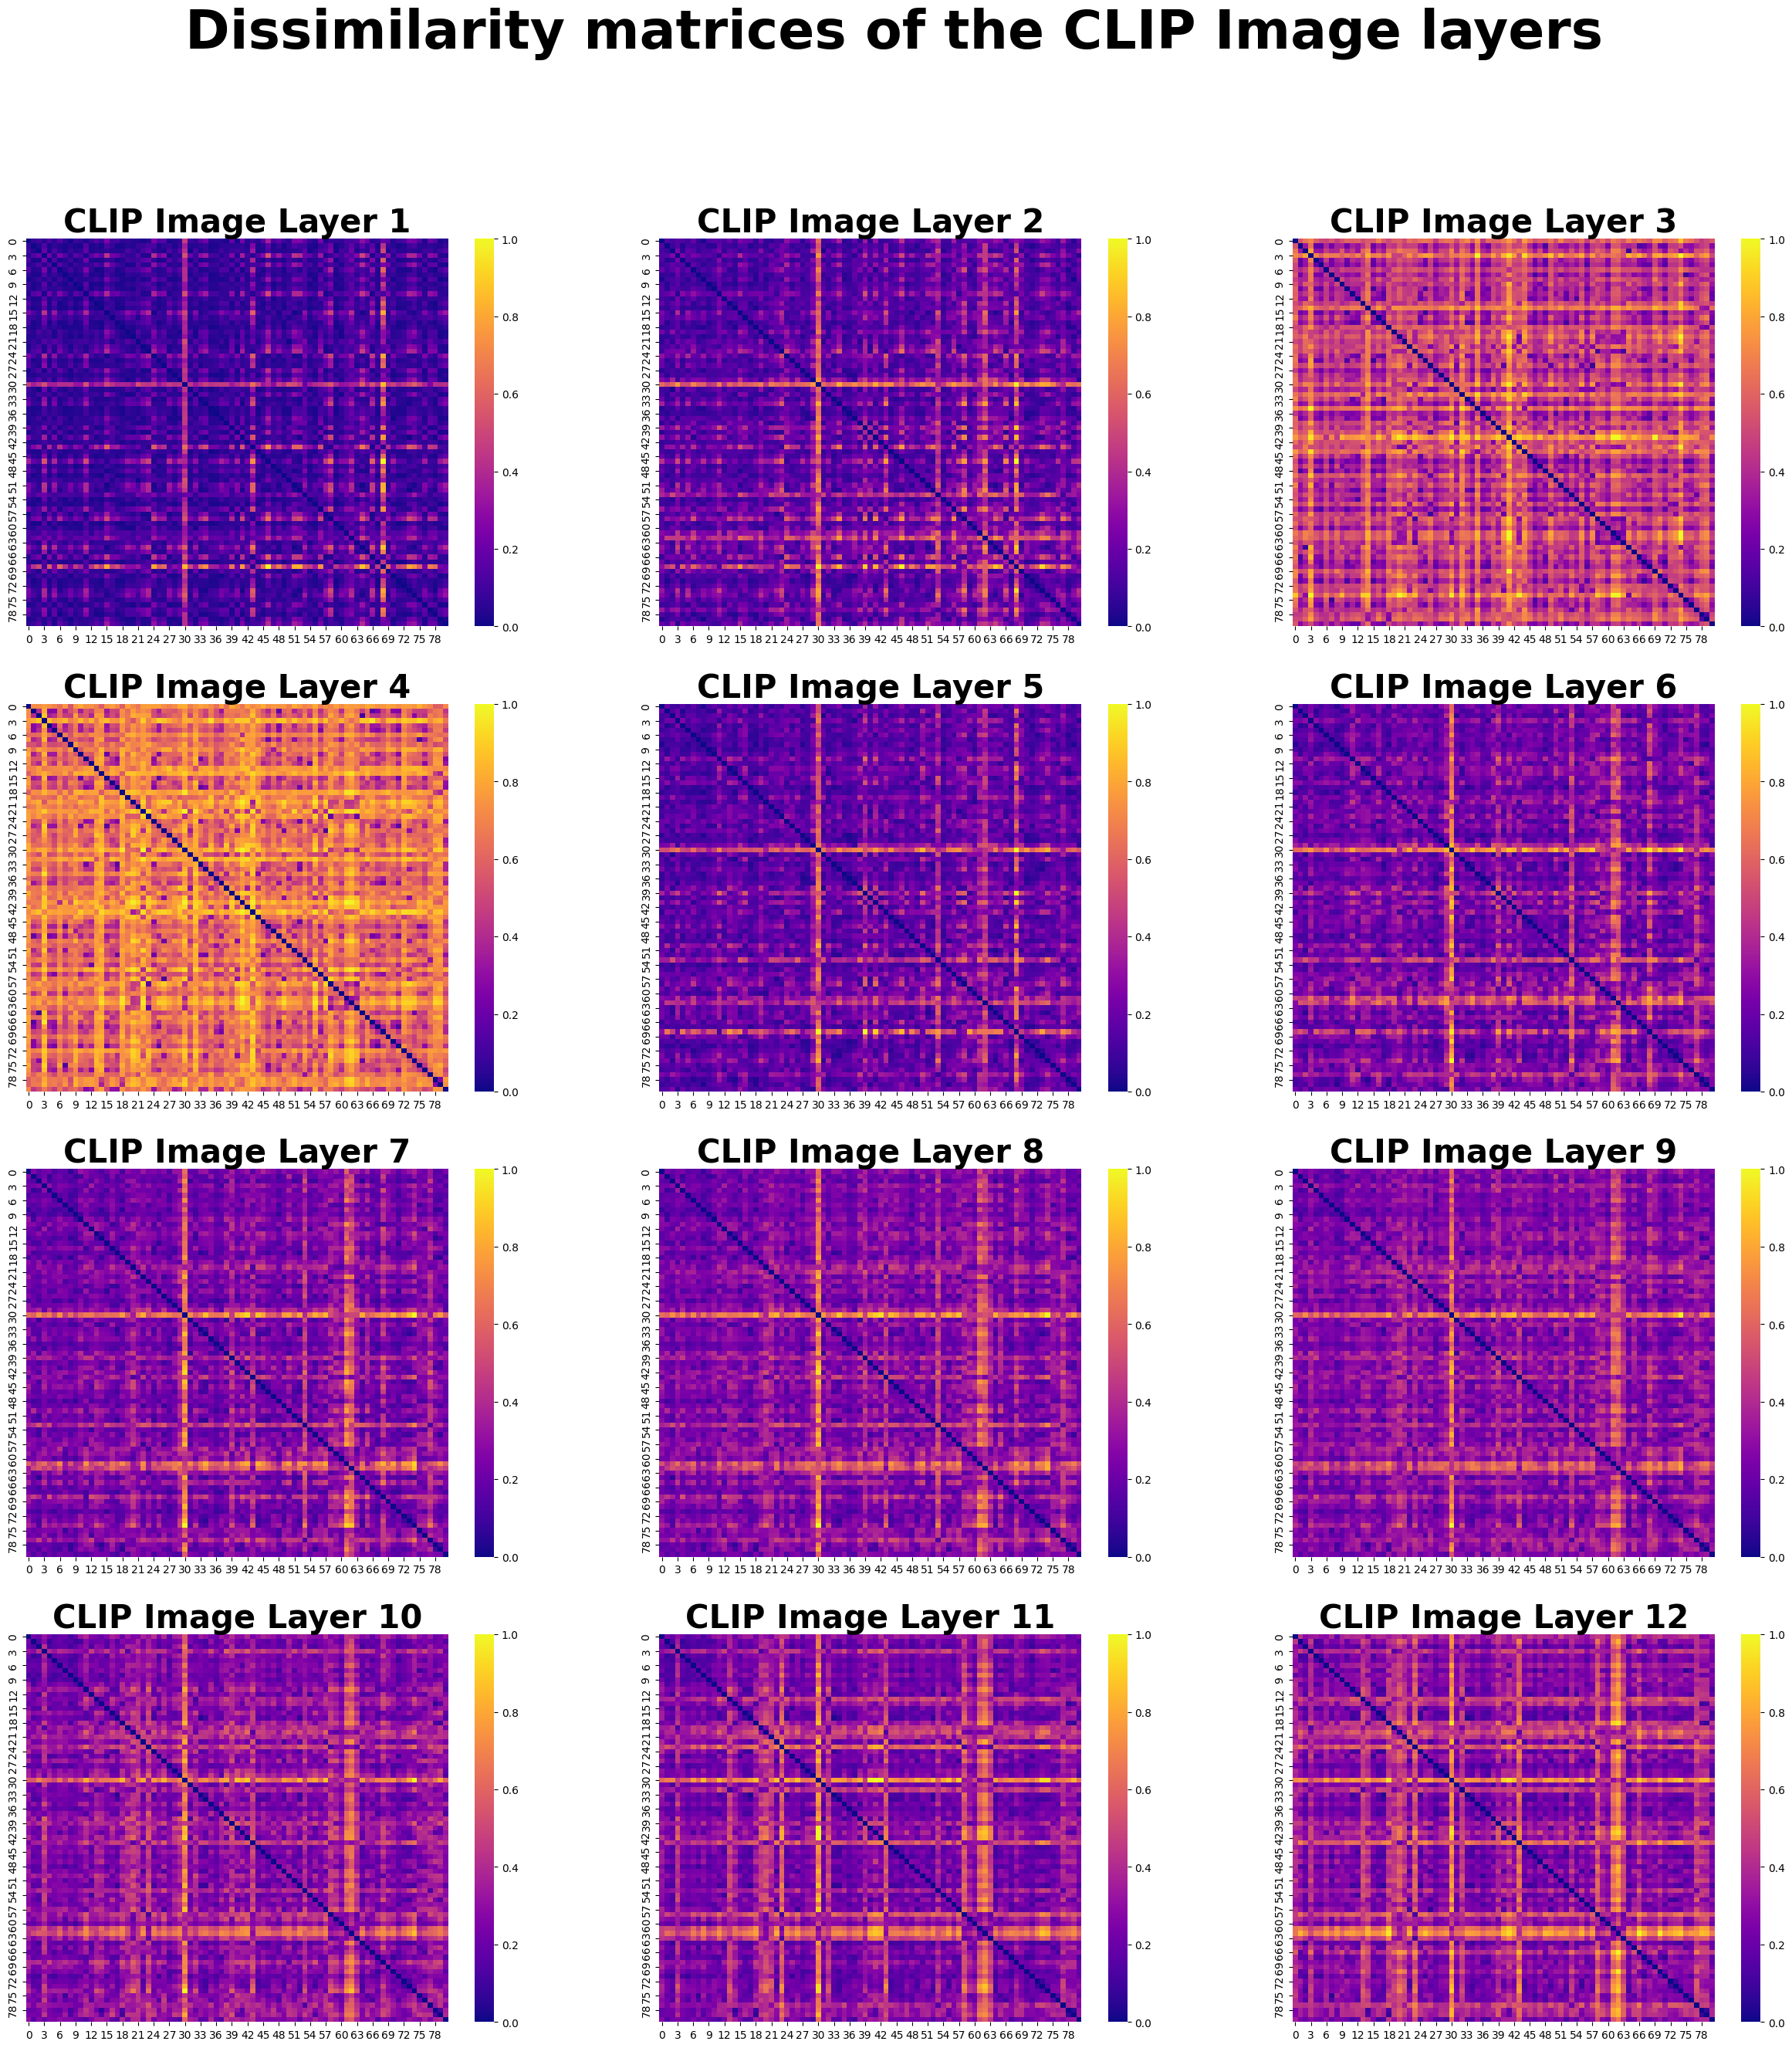

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the CLIP Image layers', fontsize=50, fontweight='bold')


plot_rdms(axs, sclip_img_rdms)

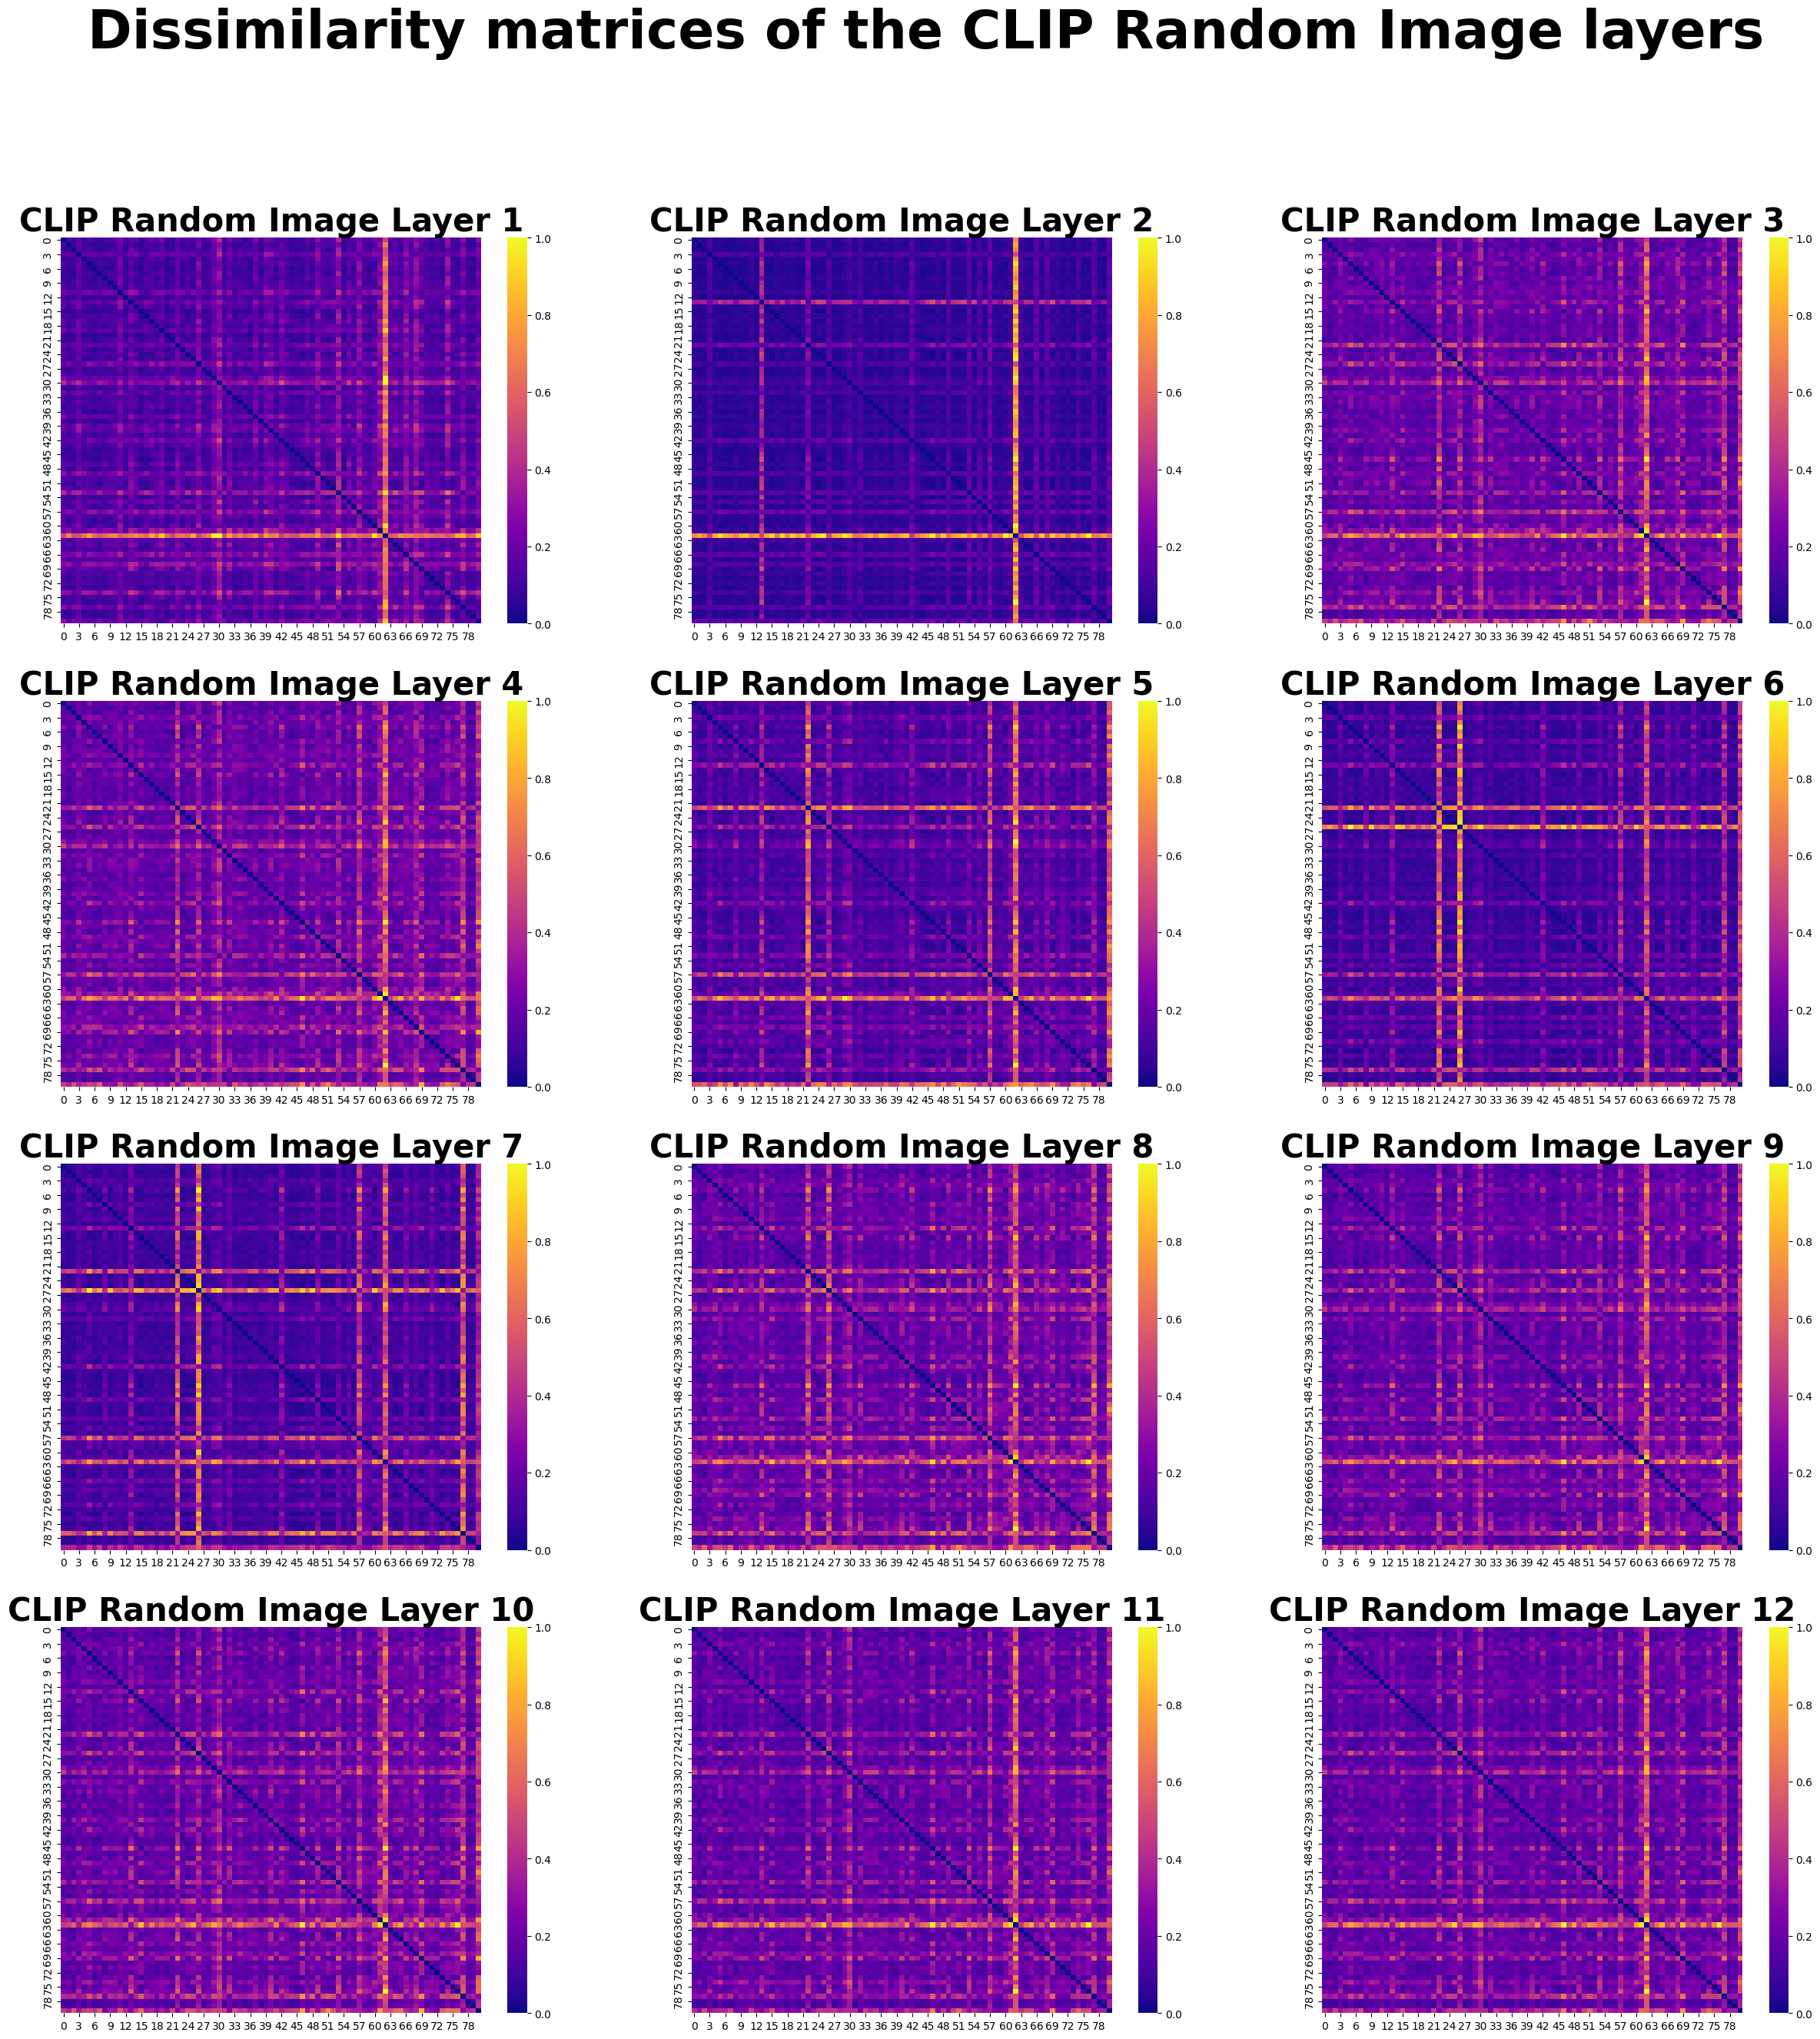

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the CLIP Random Image layers', fontsize=50, fontweight='bold')


plot_rdms(axs, sclip_random_img_rdms)

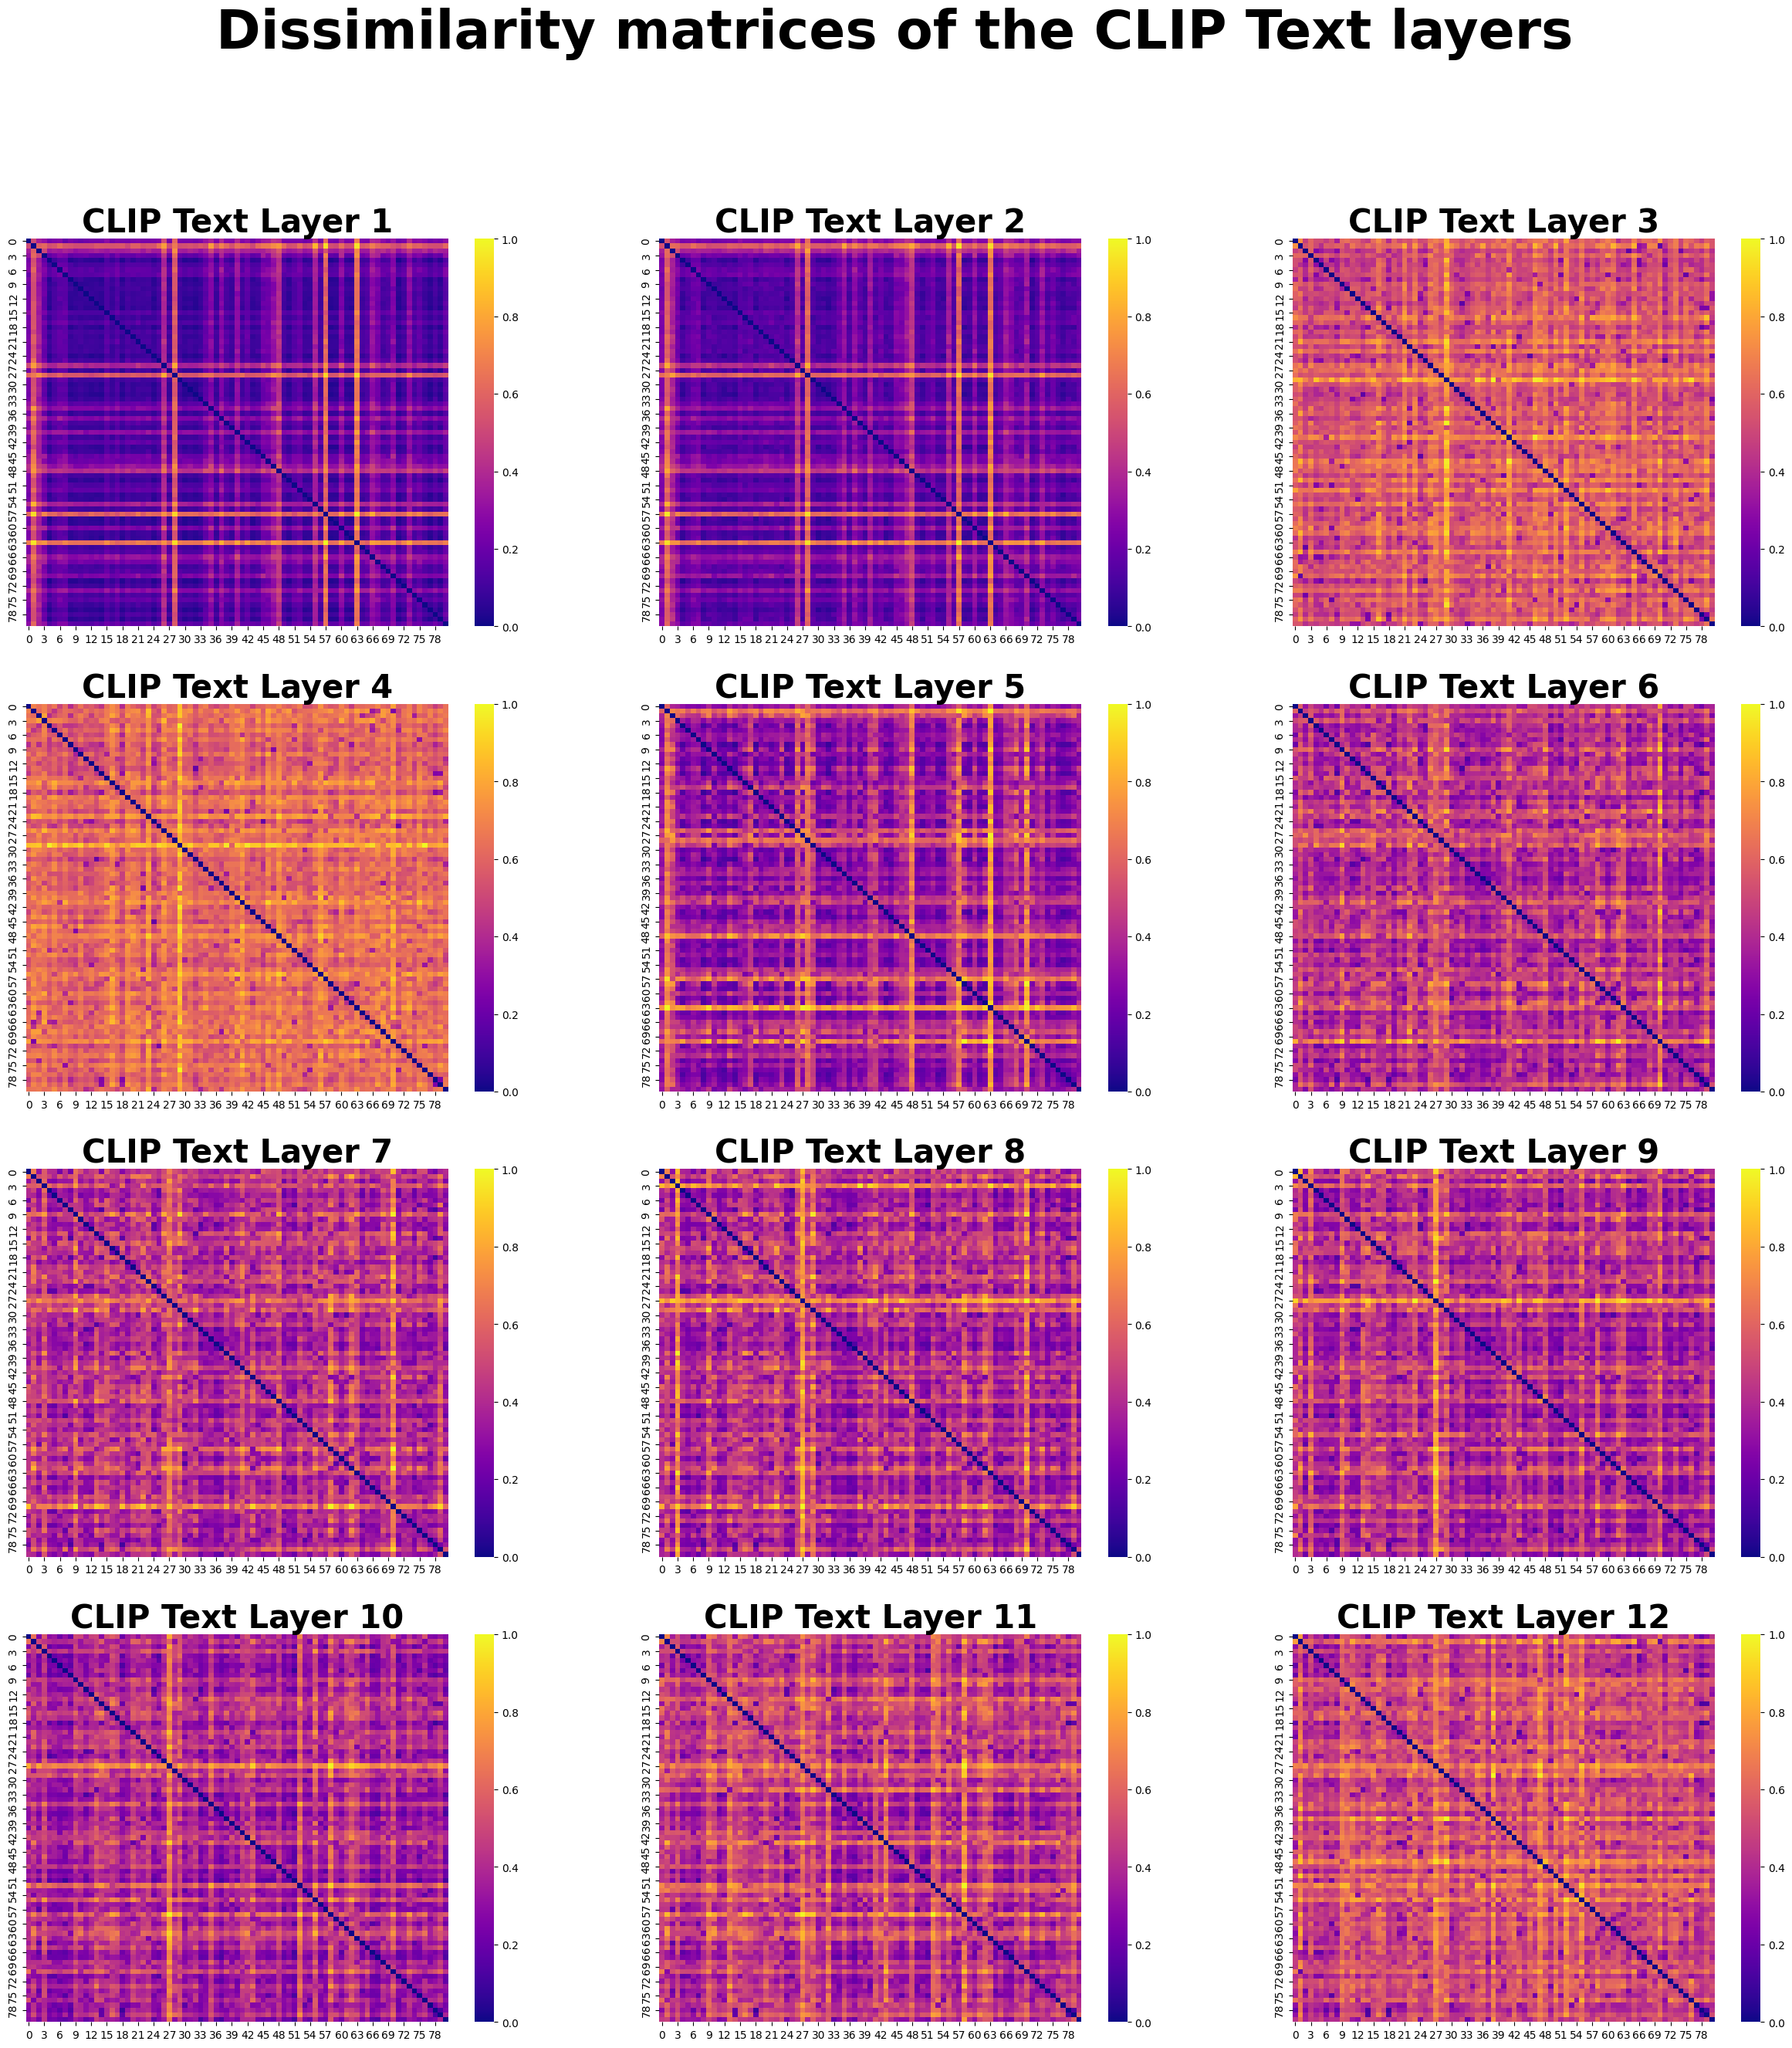

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the CLIP Text layers', fontsize=50, fontweight='bold')


plot_rdms(axs, sclip_txt_rdms)

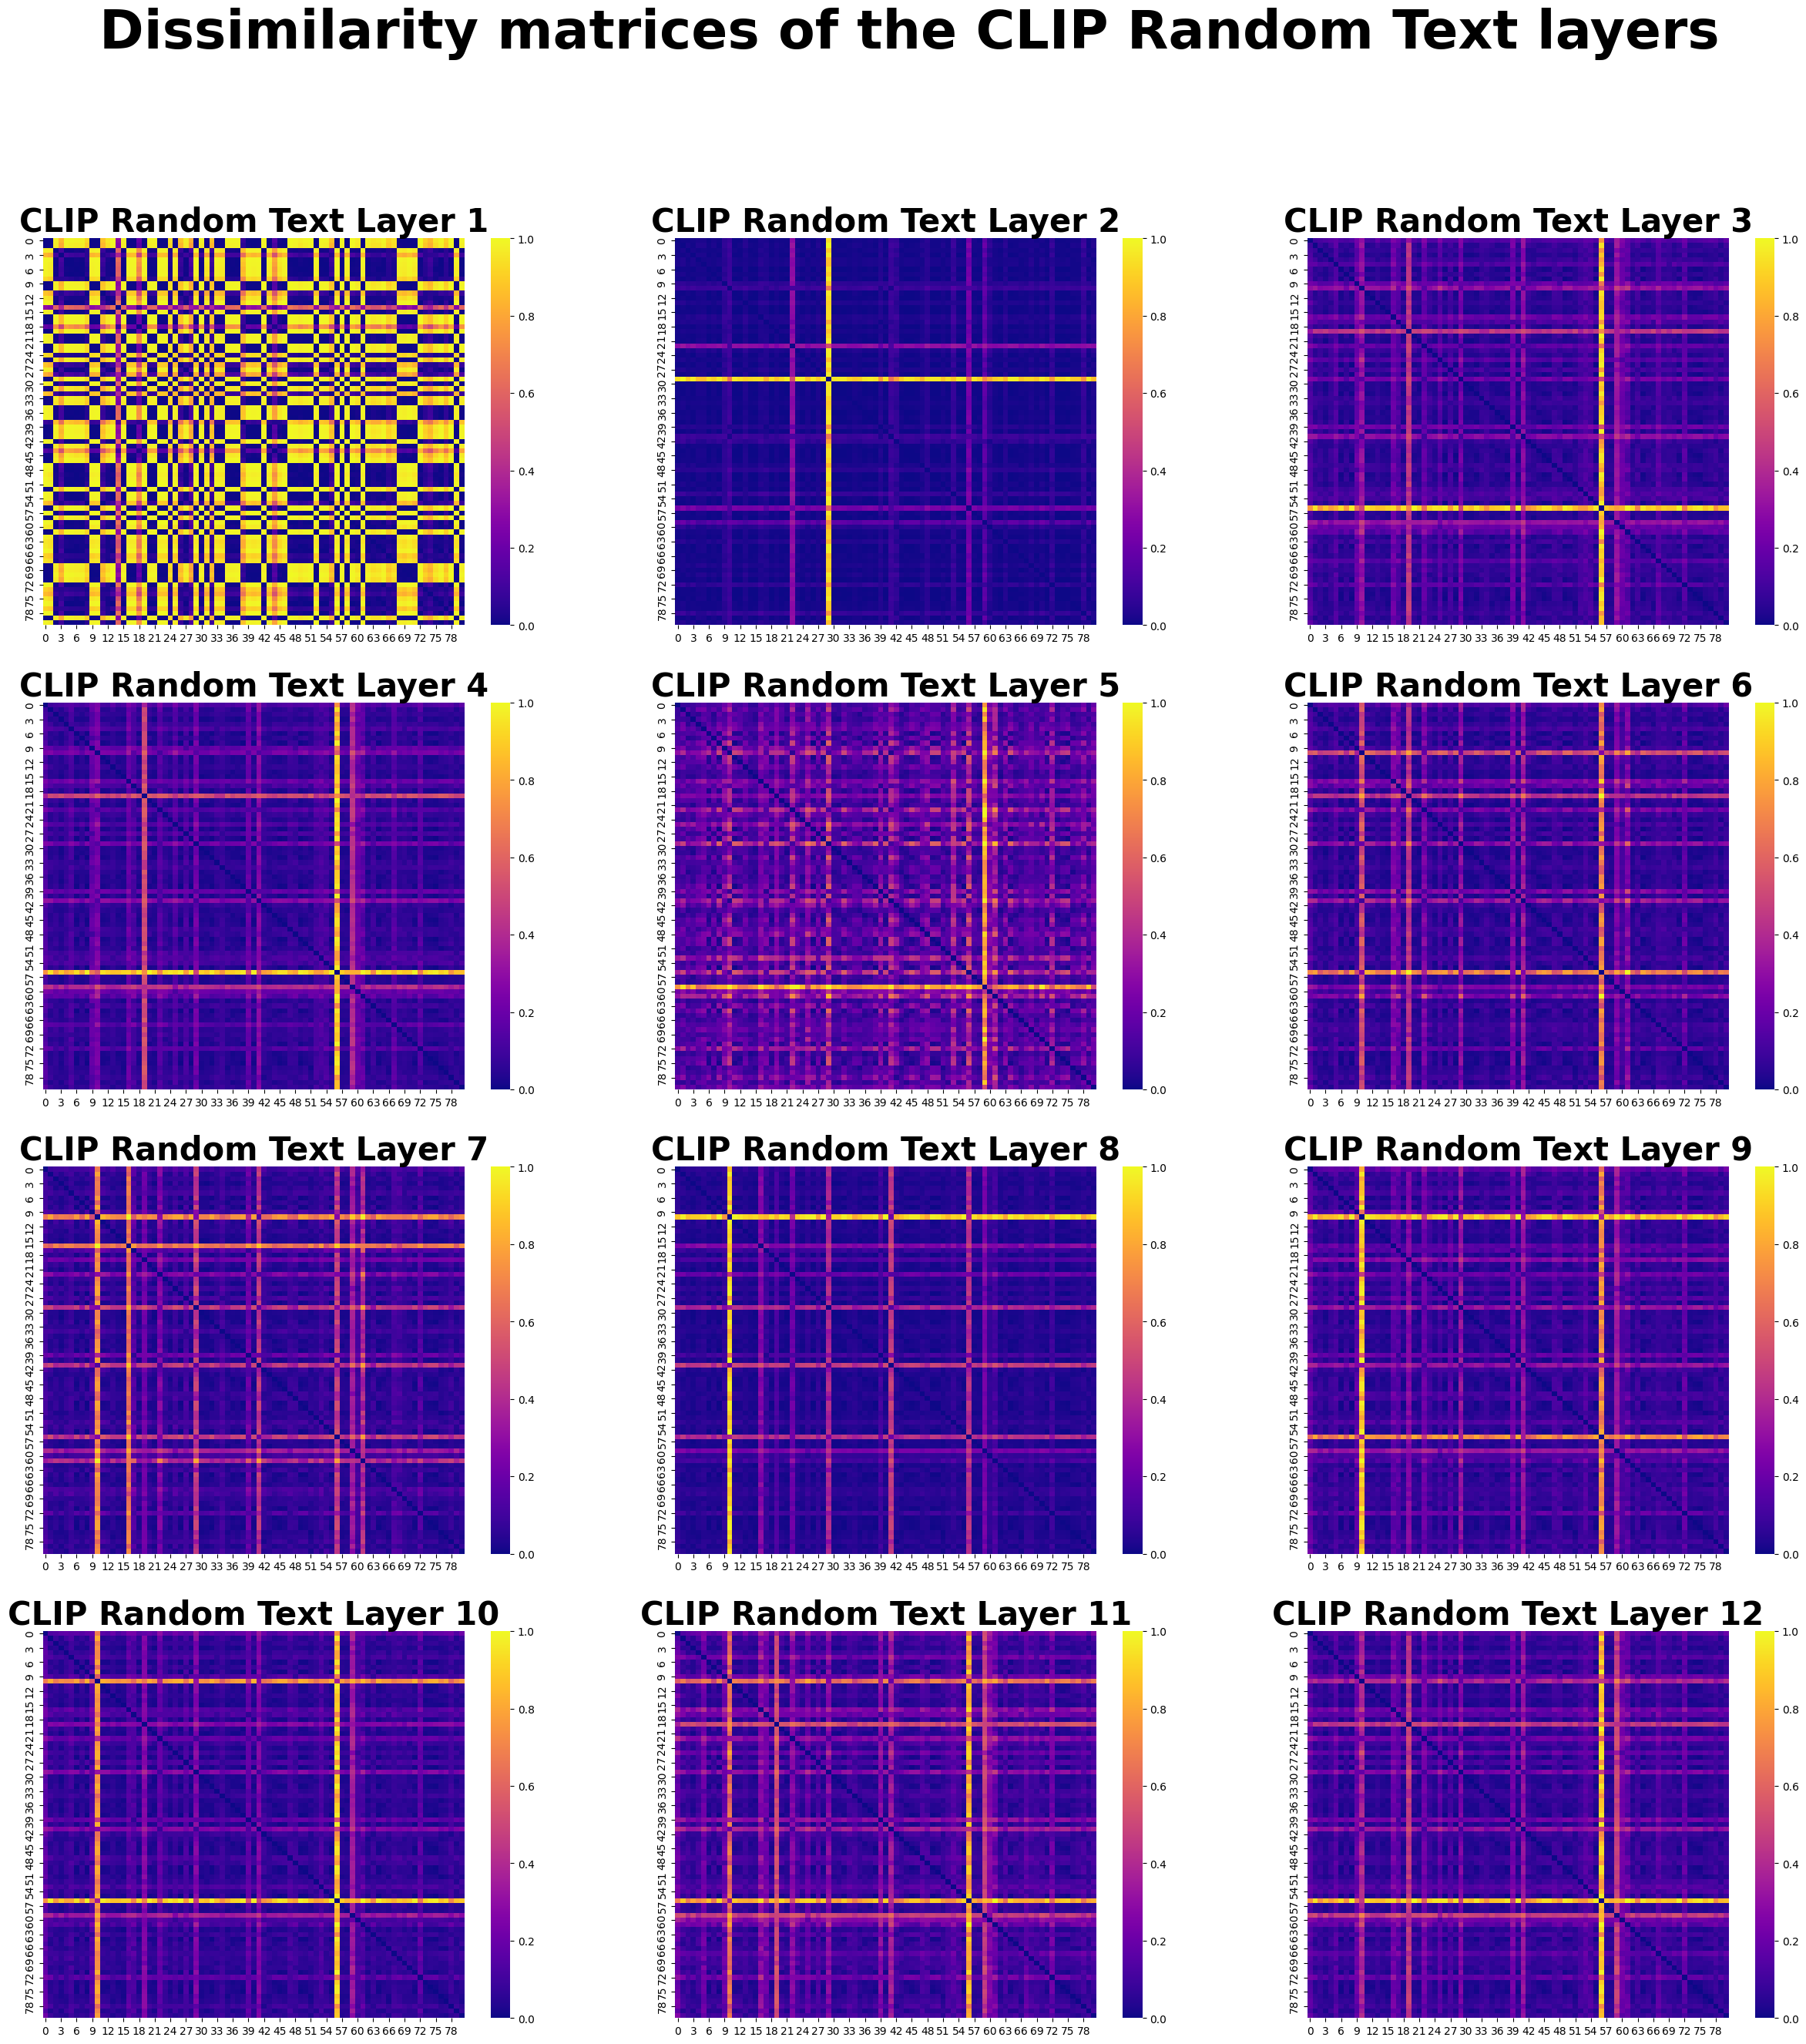

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the CLIP Random Text layers', fontsize=50, fontweight='bold')


plot_rdms(axs, sclip_random_txt_rdms)

In [8]:
%store sclip_img_rdms
%store sclip_random_img_rdms
%store sclip_txt_rdms
%store sclip_random_txt_rdms

Stored 'sclip_img_rdms' (dict)
Stored 'sclip_random_img_rdms' (dict)
Stored 'sclip_txt_rdms' (dict)
Stored 'sclip_random_txt_rdms' (dict)


In [9]:
%store clip_img
%store clip_random_img
%store clip_txt
%store clip_random_txt

Stored 'clip_img' (Tensor)
Stored 'clip_random_img' (Tensor)
Stored 'clip_txt' (Tensor)
Stored 'clip_random_txt' (Tensor)
